# 04/27 실습문제- 표본 추출 시뮬레이션 및 표본 통계량

제출시 HTML(.html) 형식으로 다운로드한 뒤, 올려주세요.

In [1]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 표시 자릿수 지정
%precision 3
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

data = pd.read_csv("health2018.csv")
height = data[data.sex == 'F'].height
height

2       157.7
3       151.0
4       146.1
5       157.2
7       168.8
        ...  
5958    157.9
5963    159.8
5964    156.9
5965    145.2
5967    163.1
Name: height, Length: 3332, dtype: float64

---

## 1. 모집단의 분포 확인
### 1-1. 모집단 height의 평균과 표준편차를 각각 m, sig로 저장하고 출력하시오.

In [27]:
m=np.mean(data[data.sex=="F"].height)
sig=np.std(data[data.sex=="F"].height)
print(m)
print(sig)

157.53676470588263
6.582459829579061


### 1-2. height의 분포를 히스토그램으로 그리고, 위에서 구한 모집단의 평균과 표준편차에 따른 정규분포 곡선을 겹쳐 그리시오.
히스토그램의 y축을 비율로 둘 것 (norm_hist = True)

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


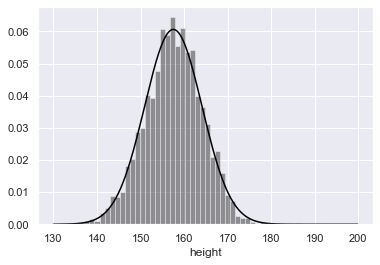

In [28]:
x = np.arange(start = 130, stop = 200, step = 0.1)
sns.distplot(data[data.sex=="F"].height, kde = False, 
             norm_hist = True, color = 'black')
plt.plot(x, 
         stats.norm.pdf(x = x, loc = m, scale = sig), 
         color = 'black')

---

## 2.표본 추출 시뮬레이션
### 2-1. 모집단 height에서 샘플을 100개씩 10000번 뽑아 '표본평균의 평균'과 '표본평균의 표준편차'를 구하시오.
표본평균의 평균과 표준편차는 모집단의 평균, 표준편차와 각각 어떤 관계에 있는가?

In [29]:
sample_mean_array = np.zeros(10000)
sample_std_array = np.zeros(10000)
np.random.seed(1)
for i in range(0, 10000):
    sample = np.random.choice(data[data.sex=="F"].height, size = 100, replace = False)
    sample_mean_array[i] = np.mean(sample)

In [30]:
sample_mean_array

array([156.964, 157.845, 157.   , ..., 158.09 , 157.327, 157.98 ])

In [37]:
np.mean(sample_mean_array) 

157.5276184

In [38]:
np.std(sample_mean_array)

0.6418603816886035

In [ ]:
#모집단의 평균 표본분산과 비슷한 값을 가진다.

### 2-2. 모집단 height에서 표본평균을 여러 번 계산하는 함수 calc_sample_mean을 작성하시오 (샘플사이즈 n_sample일 때, 표본 평균값을 n_trial 번 계산해서 array로 반환). 

In [32]:
def calc_sample_mean(n_sample, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = np.random.choice(data[data.sex=="F"].height, size = n_sample, replace = False)
        sample_mean_array[i] = np.mean(sample)
    return(sample_mean_array)

### 2-3. 모집단 height에서 샘플 사이즈를 2, 4, 6, ..., 100까지 늘려가면서, 표본평균을 50번씩 구해 표본평균의 표준편차(ddof = 1)가 어떻게 변해가는지 그래프로 그리시오. 또한 이론 상의 표준오차를 점선으로 그려 비교하시오.
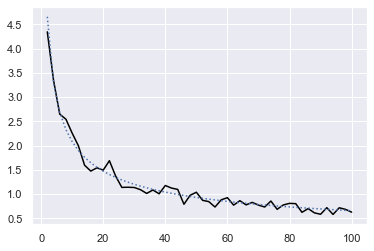

In [33]:
size_array =  np.arange(
    start = 2, stop = 102, step = 2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [34]:
sample_mean_std_array = np.zeros(len(size_array))
np.random.seed(1)
for i in range(0, len(size_array)):
    sample_mean = calc_sample_mean(n_sample =size_array[i], 
                                   n_trial = 50)
    sample_mean_std_array[i] = np.std(sample_mean, 
                                      ddof = 1)

In [35]:
standard_error = sig / np.sqrt(size_array)
standard_error

array([4.655, 3.291, 2.687, 2.327, 2.082, 1.9  , 1.759, 1.646, 1.552,
       1.472, 1.403, 1.344, 1.291, 1.244, 1.202, 1.164, 1.129, 1.097,
       1.068, 1.041, 1.016, 0.992, 0.971, 0.95 , 0.931, 0.913, 0.896,
       0.88 , 0.864, 0.85 , 0.836, 0.823, 0.81 , 0.798, 0.787, 0.776,
       0.765, 0.755, 0.745, 0.736, 0.727, 0.718, 0.71 , 0.702, 0.694,
       0.686, 0.679, 0.672, 0.665, 0.658])

Text(0, 0.5, 'mean_std value')

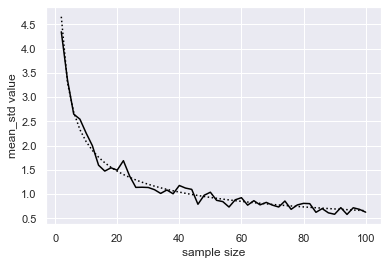

In [36]:
plt.plot(size_array, sample_mean_std_array, 
         color = 'black')
plt.plot(size_array, standard_error, 
         color = 'black', linestyle = 'dotted')
plt.xlabel("sample size")
plt.ylabel("mean_std value")